# Newton and Quasi-Newton Methods

## Problem 1

In [1]:
from scipy import optimize as opt
import numpy as np
import scipy.linalg
from matplotlib import pyplot as plt

In [2]:
def NewtonM(df,d2f,x0,tol=1e-5, maxiters=1000):
    x_k=x0
    for ii in range(1,maxiters+1):
        x_k_1=x_k - scipy.linalg.solve(d2f(x_k),df(x_k).T)
        e=scipy.linalg.norm(df(x_k),np.inf)
        x_k=x_k_1  
        if e < tol or ii == maxiters:
            break
    return x_k, ii

In [3]:
f = opt.rosen # The Rosenbrock function.
df = opt.rosen_der # The first derivative.
d2f = opt.rosen_hess # The second derivative (Hessian).
opt.fmin_bfgs(f=f, x0=[-2,2], fprime=df, maxiter=1000)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


array([1.00000021, 1.00000045])

In [4]:
NewtonM(df,d2f, np.array([-2,2]),tol=1e-5, maxiters=1000)

(array([1., 1.]), 6)

Comparing the scipy.optimize function with my NewtonM function i conclude that using Newton Methods gets closer to the true values.

## Problem 2

In [5]:
def BFGS(df,x0,tol=1e-5, maxiters=1000):
    A_k_inv= np.eye(len(x0))  
    x_k=x0
    for ii in range(0,maxiters+1):
        x_k_1=x_k - A_k_inv@df(x_k).T
        s_k=x_k_1-x_k
        y_k=df(x_k_1).T-df(x_k).T
        if (s_k.T@y_k)**2 <= 1e-40:
            break
            
          
        T1=(s_k.T@y_k+y_k.T@A_k_inv@y_k)*np.outer(s_k, s_k)
        D1=(s_k.T@y_k)**2
        T2=(A_k_inv@np.outer(y_k,s_k)+np.outer(s_k,y_k)@A_k_inv)
        D2=(s_k.T@y_k)
        A_k_1_inv=A_k_inv+T1/D1-T2/D2
            
        e=np.linalg.norm(df(x_k), np.inf)
        if e < tol or ii == maxiters:
            break
        else:
            x_k=x_k_1
            A_k_inv=A_k_1_inv
        
            
    return x_k, ii
    

In [6]:
BFGS(df,np.array([-2,2]),tol=1e-5, maxiters=400)

(array([1.00000081, 1.00000161]), 148)

## Problem 3

In [7]:
import time

In [8]:
def myfun3(N):    
    Newton_time=np.zeros(N, dtype=np.float64)
    BFGS_time=np.zeros(N, dtype=np.float64)
    scipy_time=np.zeros(N, dtype=np.float64)
    
    Newton_i=np.zeros(N)
    BFGS_i=np.zeros(N)
    scipy_i=np.zeros(N)
    
    for ii in range(N):
        x0 = np.random.uniform(low=-3,high=3,size=(2))
        start_time = time.clock()     
        x_k, iterations= NewtonM(df, d2f, x0 ,tol=1e-7, maxiters=1000)
        Newton_time[ii]= time.clock() - start_time  
        Newton_i[ii]= iterations
        
        start_time = time.clock()     
        x_k, iterations=BFGS(df,x0,tol=1e-7, maxiters=1000)
        BFGS_time[ii]= time.clock() - start_time  
        BFGS_i[ii]= iterations

        start_time = time.clock()
        scipy_res= opt.fmin_bfgs(f, x0, df, disp=False, maxiter=1000,retall=1, gtol=1e-7)
        scipy_time[ii] = time.clock() - start_time
        scipy_i[ii]= len(scipy_res[1])
        
    plt.loglog()
    plt.scatter(Newton_time, Newton_i, label= "Newton's methods", c="blue")
    plt.scatter(BFGS_time, BFGS_i, label= "BFGS", c="orange")
    plt.scatter(scipy_time, scipy_i, label= "scipy.optimize.fmin_bfgs()", c="green")
    plt.ylabel("Iterations")
    plt.xlabel("Time (seconds)")
    plt.legend()
    plt.show
    return 
        

C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\schue\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarni

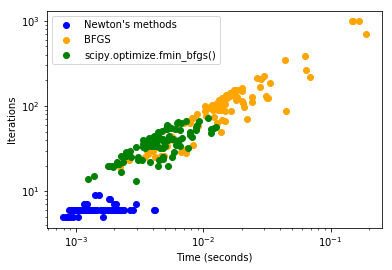

In [9]:
myfun3(100) 

## Problem 4

In [10]:
T = np.arange(10)
y = 3*np.sin(0.5*T)+ 0.5*np.random.randn(10)
model = lambda x, t: x[0]*np.sin(x[1]*t)
residual = lambda x: model(x, T) - y
jac = lambda x: np.column_stack((np.sin(x[1]*T), x[0]*T*np.cos(x[1]*T)))
x0 = np.array([2.5,.6])

In [11]:
def gauss_newton(jac, residual, x0, maxiter=10, tol=1e-5):
    x_k=x0
    conv = False
    for ii in range(maxiter):
        rix= residual(x_k)
        J_x_k=jac(x_k)
        dfx_k=J_x_k.T@rix
        d2fx_k=J_x_k.T@J_x_k
        x_k_1=x_k-scipy.linalg.solve(d2fx_k,dfx_k)
        
        e = scipy.linalg.norm(x_k_1 - x_k, np.inf)
        x_k=x_k_1
        
        if e<tol or ii==maxiter:
            if e<tol and ii<maxiter:
                conv=True
            break
    return x_k, conv, ii

In [12]:
x,conv,iters = gauss_newton(jac, residual, x0, maxiter=10, tol=1e-5)

In [13]:
x,conv,iters

(array([3.11564215, 0.47274015]), True, 4)

In [14]:
minx = opt.leastsq(func=residual, x0=np.array([2.5,.6]), Dfun=jac)
minx

(array([3.11564215, 0.47274015]), 1)

## Problem 5

In [15]:
pop=np.load("population.npy").T
t=pop[0]
y=pop[1]

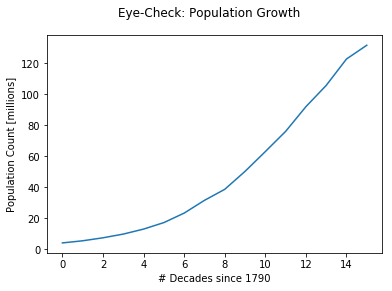

In [16]:
plt.plot(t,y)
plt.xlabel("# Decades since 1790")
plt.ylabel("Population Count [millions]")
plt.suptitle("Eye-Check: Population Growth");

In [17]:
model5 = lambda x, t: x[0]*np.exp(x[1]*(t+x[2]))
residual5 = lambda x: model5(x, t) - y
jac5 = lambda x: np.column_stack((np.exp(x[1]*(t+x[2])), x[0]*(t+x[2])*np.exp(x[1]*(t+x[2])), x[0]*x[1]*np.exp(x[1]*(t+x[2]))))

In [18]:
minx2, iteration = opt.leastsq(func=residual5, x0=np.array([1.5, .4, 2.5]), Dfun=jac5)
minx2

array([1.67729595, 0.18474177, 9.11885064])

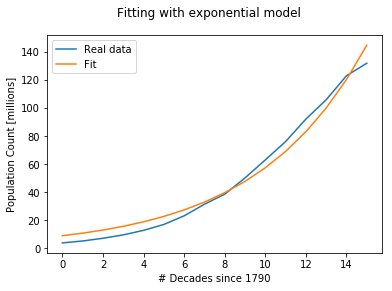

In [24]:
y_fit5= model5(minx2, t)
plt.plot(t,y, label="Real data")
plt.plot(t, y_fit5, label="Fit")
plt.xlabel("# Decades since 1790")
plt.ylabel("Population Count [millions]")
plt.legend()
plt.suptitle("Fitting with exponential model");

In [20]:
model5_2 = lambda x,t: x[0]/(1+np.exp(-x[1]*(t+x[2])))
residual5_2 = lambda x: model5_2(x,t)-y
jac5_2 = lambda x: np.column_stack((1/(1+np.exp(-x[1]*(t+x[2]))), -x[0]*(-x[2]-t)*np.exp(-x[1]*(x[2]+t))/((np.exp(-x[1]*(t+x[2]))+1)**2), x[0]*x[1]*np.exp(-x[1]*(x[2]+t))/((np.exp(-x[1]*(x[2]+t))+1)**2)))

In [21]:
minx5_2, iteration5_2 = opt.leastsq(func=residual5_2, x0=np.array([150, .4, -15]), Dfun=jac5_2)
minx5_2

array([184.76582414,   0.32169312, -12.05552938])

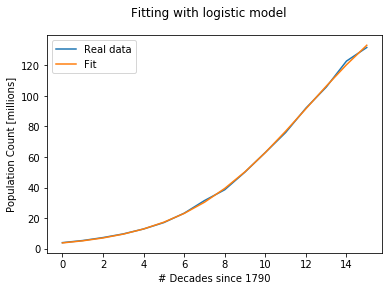

In [25]:
y_fit5_2= model5_2(minx5_2,t)
plt.plot(t,y, label="Real data")
plt.plot(t, y_fit5_2, label="Fit")
plt.xlabel("# Decades since 1790")
plt.ylabel("Population Count [millions]")
plt.legend()
plt.suptitle("Fitting with logistic model");